In [130]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [131]:
a = 0
sigma = 1
N = 100
gamma = 0.95
norm_rv = sts.norm(a, sigma)
X = norm_rv.rvs(N)

### $\LARGE \sigma^2$ Известно
$ \LARGE\mu :\Biggl( \bar{X} - U_{\frac{\gamma + 1}{2}} \frac{\sigma}{\sqrt{n}} ; \bar{X} + U_{\frac{\gamma + 1}{2}} \frac{\sigma}{\sqrt{n}} \Biggr)$ 

In [132]:
avg_x = np.array([np.sum(X[:n + 1]) / (n + 1) for n in range(N)])
x_arr = np.arange(-5, 5, 0.01)
quantile = sts.norm.ppf((1 +gamma) / 2, a, sigma)
interval_left = np.array([avg_x[n] - quantile * sigma / (math.sqrt(n + 1)) for n in range(N)])
interval_right = np.array([avg_x[n] + quantile * sigma / (math.sqrt(n + 1)) for n in range(N)])

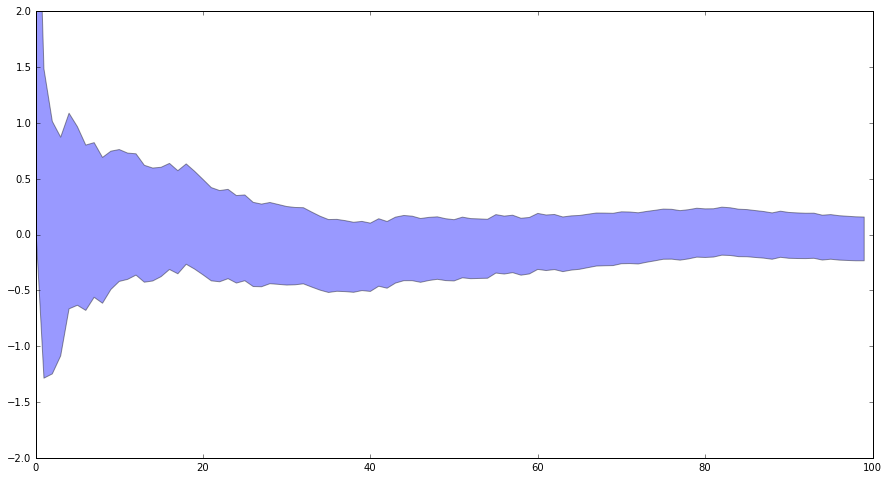

In [133]:
plt.figure(figsize = (15, 8))
plt.ylim([-2, 2])
plt.fill_between(range(N), interval_left, interval_right, facecolor = 'b', alpha = 0.4)
#plt.legend([r'know $\sigma^2$', r'do not khow $\sigma^2$'], loc = 0)

### $\LARGE \sigma^2$ Неизвестно
$\LARGE \mu : \Biggl(\LARGE \bar{X} - t_{\frac{1 + \gamma}{2}, n - 1} \frac{S}{\sqrt{n}} ; \bar{X} + t_{\frac{1 + \gamma}{2}, n - 1} \frac{S}{\sqrt{n}} \Biggr) $

In [134]:
quantile_t = np.array([sts.t.ppf((1 + gamma)/2, n - 1) for n in range (N)])
C = X**2
avg_x_2 = np.array([np.sum(C[:n + 1]) / (n + 1) for n in range(N)])
S_2 = avg_x_2 - avg_x**2
interval_left_2 = np.array([avg_x[n] - quantile_t[n] * math.sqrt(S_2[n] / (n + 1)) for n in range(N)])
interval_right_2 = np.array([avg_x[n] + quantile_t[n] * math.sqrt(S_2[n] / (n + 1)) for n in range(N)])

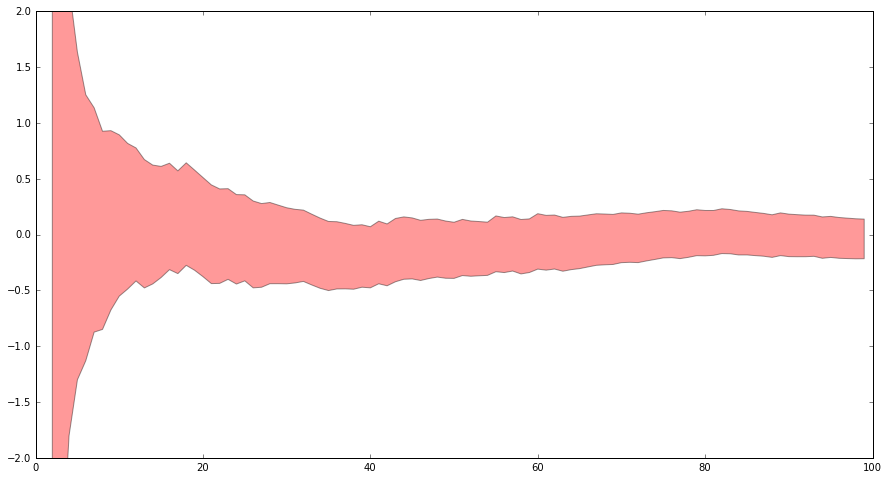

In [135]:
plt.figure(figsize = (15, 8))
plt.ylim([-2, 2])
plt.fill_between(range(N), interval_left_2, interval_right_2, facecolor = 'r', alpha = 0.4)

### $\LARGE \mu$ Известно
$ \LARGE \sigma^2 : \Biggl(\frac{\sum_{i = 1}^{n}{(X_i - \mu)}^{2}}{\chi^{2}_{\frac{1 + \gamma}{2}, n}} ; \frac{\sum_{i = 1}^{n}{(X_i - \mu)}^{2}}{\chi^{2}_{\frac{1 - \gamma}{2}, n}}\Biggr) $

In [136]:
up = np.array([np.sum((X[i] - a)**2 for i in range(n + 1)) for n in range(N)])
interval_left_3 = np.array([up[n] / (sts.chi2.ppf((1 + gamma) / 2, n)) for n in range(N)])
interval_right_3 = np.array([up[n] / (sts.chi2.ppf((1 - gamma) / 2, n)) for n in range(N)])

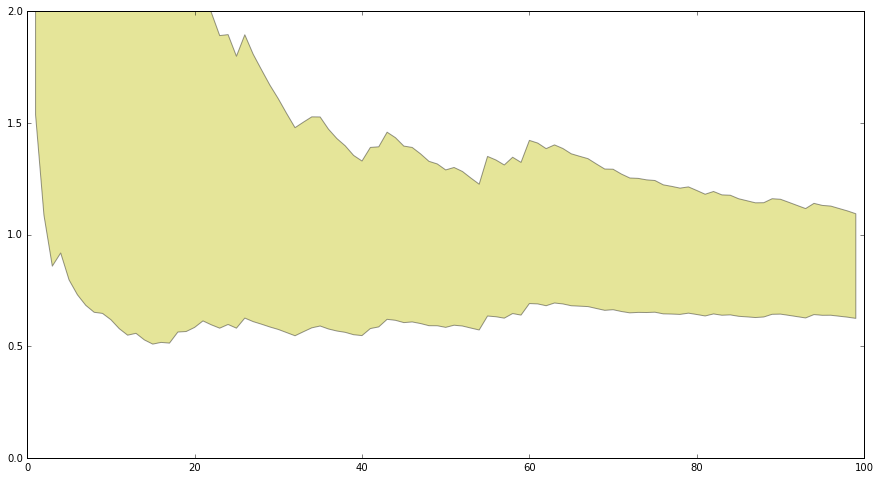

In [137]:
plt.figure(figsize = (15, 8))
plt.ylim([0, 2])
plt.fill_between(range(N), interval_left_3, interval_right_3, facecolor = 'y', alpha = 0.4)

#plt.legend([r'khow $\mu$', r'do not know $\mu$'])

### $\LARGE \mu$ Неизвестно
$ \LARGE \sigma^2 : \Biggl(\frac{(n - 1){S}^{2}}{\chi^{2}_{\frac{1 + \gamma}{2}, n - 1}} ; \frac{(n - 1){S}^{2}}{\chi^{2}_{\frac{1 - \gamma}{2}, n - 1}}\Biggr) $

In [154]:
interval_left_4 = np.array([((n - 1)*S_2[n]) / (sts.chi2.ppf((1 + gamma) / 2, n - 1)) for n in range(1, N)])
interval_right_4 = np.array([((n - 1)*S_2[n]) / (sts.chi2.ppf((1 - gamma) / 2, n - 1)) for n in range(1, N)])

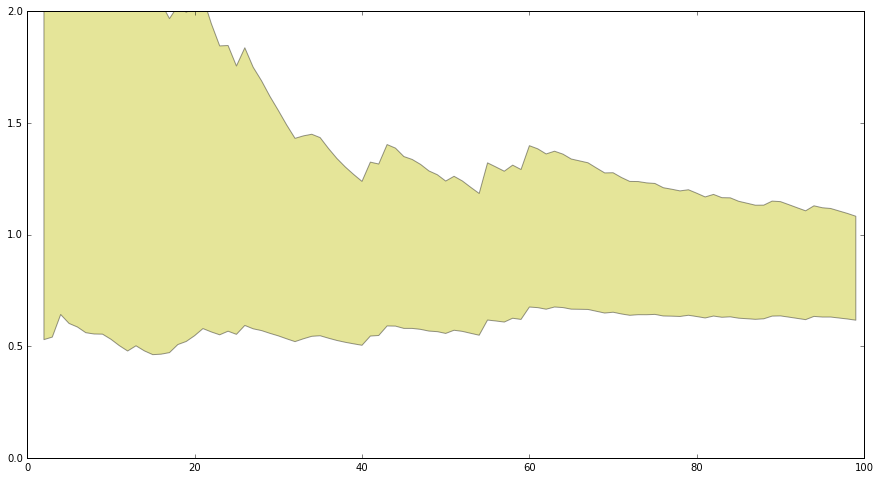

In [155]:
plt.figure(figsize = (15, 8))
plt.ylim([0, 2])
plt.fill_between(range(1, N), interval_left_4, interval_right_4, facecolor = 'y', alpha = 0.4)

### Истинные значения параметров лежат внутри доверительных интервалов с приличным запасом. Что касается взаимного расположения интервалов при известном и неизвестном параметрах, то интервал с известным параметром находится внутри неизвестного. Это происходит потому,  что интервал получается точнее. Проверим это на графике. 

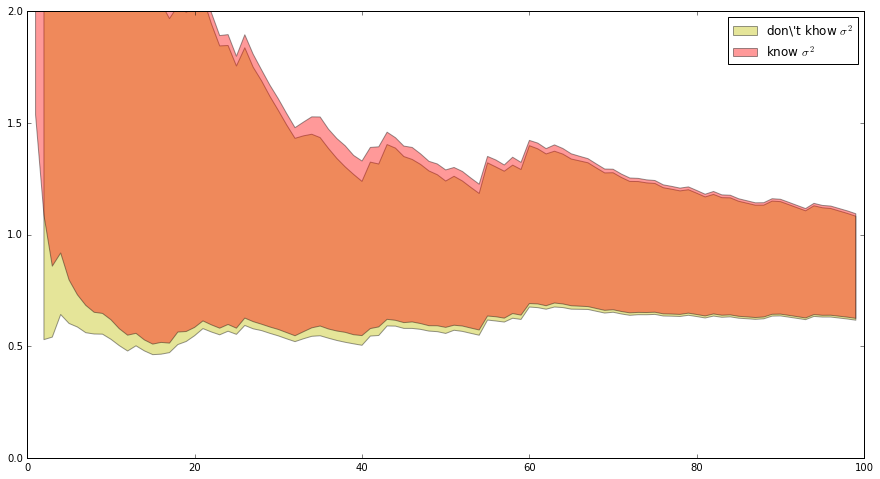

In [153]:
plt.figure(figsize = (15, 8))
plt.ylim([0, 2])
plt.fill_between(range(1, N), interval_left_4, interval_right_4, facecolor = 'y', alpha = 0.4)
plt.fill_between(range(N), interval_left_3, interval_right_3, facecolor = 'r', alpha = 0.4)
plt.legend([r'don\'t khow $\sigma^2$', r'know $\sigma^2$'])